*********************** Modificiacion



Esta notebook recoge una matriz de 27 x 27 pixels que representan 500m cada pixel.


Aunque al final tabajaremos con matrices de 25 x 25 estas matrices permiten mover la matriz de seleccion 500m en cada direccion, esta podrá ser una de nuestras tecnicas para aumentar el numero de datos de entrada.


HAY QUE ANYADIR UNA DE TIPO DE VEGETACION.
HAY UNA DE 13 TIPOS DE VEGETACION. Cada tipo sera una capa.
(FBFM13 was evaluated through a series of workshops held across the nation with fire and fuels specialists. Workshop participants reviewed and adjusted surface fuel model rulesets using unique combinations of Existing Vegetation Type (EVT), Existing Vegetation Cover (EVC), Existing Vegetation Height (EVH), and in some cases Biophysical Settings (BPS).)

pero al hacer la unificacion de la capa de vegetacion de 30m 500m no hay que recoger la media sino el tipo de vegetacion mas presente en cada pixel final, agrupando segun el tipo de vegetacion



1o hay que hacer una funcion que a partir de los datos recogidos en la recogida de l  .........(_8-o)
calcule cual es el valor mayoritario en cada uno de los recuadros de 27 x 27

************************** PescarTOPO_A_500m_Nov_7-TRES-D



In [1]:


import geopandas as gpd
import rasterio 

from rasterio.mask import mask
from rasterio import plot

from pyproj import Proj, transform
from shapely.geometry import Point,Polygon

import fiona

import pandas as pd

import numpy as np

from PIL import Image

import matplotlib.pyplot as plt

#%matplotlib inline

In [2]:


altitud=rasterio.open("LF/DEMTIFS/dem_1.tif") 
altitud.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -9999.0,
 'width': 15580,
 'height': 15231,
 'count': 1,
 'crs': CRS({'proj': 'aea', 'lat_1': 29.5, 'lat_2': 45.5, 'lat_0': 23, 'lon_0': -96, 'x_0': 0, 'y_0': 0, 'datum': 'NAD83', 'units': 'm', 'no_defs': True}),
 'transform': (-2362425.0, 30.0, 0.0, 2458755.0, 0.0, -30.0),
 'affine': Affine(30.0, 0.0, -2362425.0,
        0.0, -30.0, 2458755.0)}

# PRIMERO HEMOS CALCULADO LOS MAXIMOS Y LOS MINIMOS DE CADA ATRIBUTO DENTRO DEL TERRITORIO 

dem=["LF/DEMTIFS/dem_1.tif","LF/DEMTIFS/dem_2_3_4.tif","LF/DEMTIFS/dem_5.tif"]
slope=["LF/SlopeTIFS/slope_1.tif","LF/SlopeTIFS/SLOPE_2_3_4.tif"]
aspect=["LF/AspectTIFS/aspect_1_2_3.tif", "LF/AspectTIFS/aspect_2_4.tif"]


minimosMaximos=[]

minMax=[]
stats = []
for documents in dem:
    datos=rasterio.open(documents)

    array = datos.read()
    #sin contar los valrores vacios
    array[array==-9999] = 0
    for band in array:
        stats.append(band.min())
        stats.append(band.max())


demMIN,demMAX=np.min(stats),np.max(stats)
print(demMIN,demMAX)
minMax.append(demMIN)
minMax.append(demMAX)
minimosMaximos.append(minMax)

minMax=[]
stats = []
for documents in slope:
    datos=rasterio.open(documents)

    array = datos.read()
    #sin contar los valrores vacios
    array[array==-9999] = 0
    for band in array:
        stats.append(band.min())
        stats.append(band.max())


slopeMIN,slopeMAX=np.min(stats),np.max(stats)
print(slopeMIN,slopeMAX)
minMax.append(slopeMIN)
minMax.append(slopeMAX)
minimosMaximos.append(minMax)

minMax=[]
stats = []

for documents in aspect:
    datos=rasterio.open(documents)

    array = datos.read()
    #sin contar los valrores vacios
    array[array==-9999] = 0
    for band in array:
        stats.append(band.min())
        stats.append(band.max())


aspectMIN,aspectMAX=np.min(stats),np.max(stats)
print(aspectMIN,aspectMAX)
minMax.append(aspectMIN)
minMax.append(aspectMAX)
minimosMaximos.append(minMax)

minimosMaximos


In [3]:
# ESTE HA SIDO EL RESULTADO EN EL ORDEN:   DEM, SLOPE, ASPECT

#estos datos son fijos para toda la investigacion

minimosMaximos=[[-86, 4415], [0, 85], [-1, 359]]
minimosMaximos

[[-86, 4415], [0, 85], [-1, 359]]

# A PARTIR DE LOS TIFS DE LANDFIRE.GOV, USANDO LA LIBRERIA GEORASTERS HEMOS COMBINADO LOS TIFS BUSCANDO EL TAMANYO MINIMO ASEGURAR QUE TODOS LOS PUNTOS ESTAN CUBIERTOS CON 12KM ALTREDEDOR Y HEMOS CREADO UN SISTEMA DE SELECCION DE TIF SEGUN LAS COORDENADAS

metodo usado para la creacion de tiffs conjuntos

import georasters as gr


dem2 = gr.from_file('LF/DEMTIFS/dem_2.tif')
dem3 = gr.from_file('LF/DEMTIFS/dem_3.tif')

dem23 = dem2.union(dem3)
dem23.to_tiff('LF/DEMTIFS/tifDEM/dem2_3.tif')





In [4]:
#Seleccion de tif
def seleccionTifDEM(long,lat):

    if (lat > 38.9):
        
        tifEntreComillas="LF/DEMTIFS/dem_1.tif"  

    elif (lat > 35.8):
        
        tifEntreComillas="LF/DEMTIFS/dem_2_3_4.tif"   
        
    elif (long < -119.1):

        tifEntreComillas="LF/DEMTIFS/dem_2_3_4.tif"      
        
    elif (lat > 35.2) and (long < -118): 

        tifEntreComillas="LF/DEMTIFS/dem_2_3_4.tif"       

    else:    
        
        tifEntreComillas="LF/DEMTIFS/dem_5.tif"  
 
    return tifEntreComillas


In [5]:
def seleccionTifSlope(long,lat):

    if (lat > 37.5) and (long < -119.5):
        
        tifEntreComillas="LF/SlopeTIFS/slope_1.tif"  
        
    else:    
        
        tifEntreComillas="LF/SlopeTIFS/slope_2_3_4.tif"  
 
    return tifEntreComillas



In [6]:
def seleccionTifASPECT(long,lat):

    if (long < -119.5):
        
        tifEntreComillas="LF/AspectTIFS/aspect_1_2_3.tif"  
       
    else: 
        
        tifEntreComillas="LF/AspectTIFS/aspect_2_4.tif" 
 
    return tifEntreComillas


In [7]:
def seleccionTifFuel(long,lat):

    if (long < -118):
        
        tifEntreComillas="LF/fuel_13/fuel_1.tif"  
       
    else: 
        
        tifEntreComillas="LF/fuel_13/fuel_2.tif" 
 
    return tifEntreComillas


In [8]:
#no lo incluyo pq son demasiadas categorias

def seleccionTifVEGETACION(long,lat):

    if (long < -118):
        
        tifEntreComillas="LF/vegeta/vegetacion_1.tif"  
       
    else: 
        
        tifEntreComillas="LF/vegeta/vegetacion_2.tif" 
 
    return tifEntreComillas


In [9]:
def prepararMatrix(CapaMatriz, ValorMinimoPosible=-999,ValorMaximoPosible=-999, numeroPixels=25, normalizada=True):

    
    # AL INTRODUCIR LA MATRIZ SE COMPRUEBA SI SUS VALORES ESTAN DENTRO DE LOS LIMITES ACEPTABLES 

    #pasamos el array a 1 dimension para poder cambiar Todos los datos extremos por el valor maximo
    a1D = CapaMatriz.reshape((len(CapaMatriz)*len(CapaMatriz[0])),1)

    #creamos un contador de extremos (si hubiera muchos, posiblemente habria un problema con el supuesto valor maximo)
    contadorExtremos0 = 0
    if ValorMinimoPosible != -999:
        for valor in range(len(a1D)):
            if a1D[valor] < ValorMinimoPosible:
                a1D[valor] = ValorMinimoPosible

                contadorExtremos0 = contadorExtremos0+1
       
        #print(f"Se han encontrado {contadorExtremos0} elementos extremos que se han substituido por el valor minimo: {ValorMinimoPosible}")       
        if contadorExtremos0>2:
            print(print(f"Se han encontrado {contadorExtremos0} elementos extremos que se han substituido por el valor minimo: {ValorMinimoPosible}"))       

    else:
        #Si estos valores no estuvieran saldrá un aviso
        ValorMinimoPosible=0
        print("falta el valor minimo posible de este atributo")

 
    contadorExtremos = 0

    if ValorMaximoPosible != -999:
        for valor in range(len(a1D)):
            if a1D[valor] > ValorMaximoPosible:
                a1D[valor] = ValorMaximoPosible
                contadorExtremos = contadorExtremos+1

        #print(f"Se han encontrado {contadorExtremos} elementos extremos que se han substituido por el valor maximo: {ValorMaximoPosible}")       
        if contadorExtremos0>2:
            print(print(f"Se han encontrado {contadorExtremos0} elementos extremos que se han substituido por el valor minimo: {ValorMinimoPosible}"))       
                  
    else:
        #Si estos valores no estuvieran saldrá un aviso
        ValorMaximoPosible=50
        print("falta el valor maximo posible de este atributo")
        
    #devolvemos el array a la matriz original SIN LOS VALORES EXTREMOS
    XArray = a1D.reshape(len(CapaMatriz),len(CapaMatriz[0]))
#print(f"Sin extremos:\n{XArray}")

    #guardamos los max y minimos de la matriz original
    miniMat=XArray.min()
    maxiMat=XArray.max()
#print(miniMat)

    XArrayA0 = (XArray-XArray.min()) #esto mueve el rango de 0 a max
    arrayNorm0_1 = XArrayA0/XArrayA0.max() #esto lo normaliza
#print(f"Normalizada:{arrayNorm0_1}") #Esto es con lo que alimentaremos la imagen para la creacion o fusion de N pixels
    
    
    #convertimos el array en una imagen con valor min = 0 azul y max = 255 amarillo
    img = Image.fromarray((arrayNorm0_1 * 255).astype(np.uint8))
#plt.matshow(img)
    #convertimos la imagen en matriz
    img2 = img.resize((numeroPixels, numeroPixels), Image.BICUBIC) #ANTIALIAS) #BILINEAR) NEAREST
    
    arrayImagen = np.array(img2, copy=True)
    
    #print(f"Nuevo Tamanyo:\n{arrayImagen}")

    # CONVERSION DE LA IMAGEN EN COLOR MODIFICADA O NO, A UNA MATRIZ EN BASE A LOS MAXIMOS Y MINIMOS DE LA MATRIZ ORIGINAL

    casiNormalizado=arrayImagen/arrayImagen.max()


    miniFoto=casiNormalizado.min()
    maxiFoto=casiNormalizado.max()

    for x in range(len(casiNormalizado)):
        for y in range(len(casiNormalizado[x])):
            if casiNormalizado[x][y] == miniFoto:
                casiNormalizado[x][y] = miniMat
            elif casiNormalizado[x][y] == maxiFoto:
                casiNormalizado[x][y] = maxiMat
            else: 
                casiNormalizado[x][y] = ((casiNormalizado[x][y])*(maxiMat-miniMat)) + miniMat
        conValoresReales=casiNormalizado
        
        
    if normalizada==False :        
        return conValoresReales     
        
    else:
        #print(casiNormalizado)
        
        rango = ValorMaximoPosible - ValorMinimoPosible

        matrizNormalizadaEnAbsolutos = (conValoresReales-ValorMinimoPosible)/rango

        return matrizNormalizadaEnAbsolutos 

In [10]:
# marcamos los limites de la seleccion de puntos a la que nos limitan los datos metereologicos 
#originado en el notebook PescarMeteo_A_500m_Nov_6-TRES-D

boundary=gpd.read_file("poligonoMeteo/nc_shrinkboundary.shp")

def estaDentro(long,lat,boundary=boundary):
    estaDentro=True
    df = pd.DataFrame([[long,lat]], columns=list('XY'))
    punto= gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['X'], df['Y']))
    punto.crs={'init': 'epsg:4326'}

    if punto.within(boundary)[0]==False:
        print('No tenemos datos de este punto geografico')
        estaDentro=False
    return estaDentro


In [11]:
# FUNCION PARA RECOGER LA MODA (EL NUMERO MAS FRECUENTE) EN UNA MATRIZ

# En caso de empate escoge el primero de los numeros empatadso que ha encontrado.

### SOLO FUNCIONA CON MATRICES IMPARRES QUE TIENEN UN CENTRO
from collections import Counter

#import math
def isForest(matriz):
    esbosque=True
    ValorLimite=13
    
    valores=matriz.flatten()
    c = Counter(list(valores))
    
    modageneral=c.most_common(1)[0][0]

    posicionCentral=np.floor((len(matriz.flatten()))/2)
    

    valorCentral=valores[int(posicionCentral)] 

# si el valor central esta en una zona sin bosque no se considera bosque 
    if valorCentral > ValorLimite:
        print(f"El valor central de la matriz es {valores[int(posicionCentral)]}")
        esbosque=False
        return esbosque
    
    elif valorCentral == 0:
        print(f"El valor central de la matriz no tiene informacion sobre vegetacion")
        esbosque=False
        return esbosque        
    
    moda=c.most_common()
    totalNoForest=0
    for m in moda:
        #print(m)
        typo=m[0]
        
        if (typo > ValorLimite) or (typo == 0):
            #print(m[0])
            totalNoForest=totalNoForest+m[1]
            
    # si mas de la mitad de los valores estan en una zona sin bosque no se considera bosque     
    if len(valores) <= (2*totalNoForest):
        print(f"Hay {totalNoForest} valores sin bosque")
        esbosque=False
        
    print(f"El valor mas repetido en la variable es {modageneral}")
    return esbosque

  
        


In [12]:
#previamente se tiene que haber creado la carpeta: poligonoDerecogida

#Tb es necesaria la carpeta LF/SlopeTIFS con los tifs recogidos de landfire.com + un tif creado que recoge los datos de cruce para evitar recogidas cortadas de datos en el punto de cruce de las 4 imagenes originales.


def GeoPointsTranslator(x,y,deESPG=4326,aESPG=5070): #42303
    #USAMOS ESTA PROYECCION PQ PARECE ADECUADA PARA CALIFORNIA PERO PARECE QUE TB PODRIA SER  ESPG:42303

    inProj = Proj("+init=EPSG:"+str(deESPG))     
    outProj  = Proj("+init=EPSG:"+str(aESPG))#,preserve_units=True)
 
    return transform(inProj,outProj,x,y)





# queremos recuperar una matriz de 13.3 de lado para poder mover los puntos de entrada posteriormente
# En caso de que mas de la mitad de los puntos alrededor o de que el punto central de la matriz no sean forest (segun la calsificacion de fuel) devuelve -9999

def coord2Matrix27(longWGS,latWGS,km2=13.5,minimosMaximos=minimosMaximos):
    
    if estaDentro(longWGS,latWGS)==False:
        return (long, lat)   
    
    
    deESPG=4326
    aESPG=5070
    
    #CAMBIANDO LOS TIFS PODEMOS RECIBIR LAS MATRICES DE OTRAS FUNCIONES
    #Esto depende de los tifs. En este caso son los tifs de SLOPE
    demTif=seleccionTifDEM(longWGS,latWGS)
    sloTif=seleccionTifSlope(longWGS,latWGS)
    aspTif=seleccionTifASPECT(longWGS,latWGS)
    
    #es de clasificiacion
    fueTif=seleccionTifFuel(longWGS,latWGS)
    #vegTif=seleccionTifVEGETACION(longWGS,latWGS)
    
    coordenadaCentral=GeoPointsTranslator(longWGS,latWGS,deESPG,aESPG)
    coordenadaCentral[0],coordenadaCentral[1]

    #5070 esta en metros por lo que aqui podemos elegir los metros que queremos
    c=(km2*1000)/2
    #c=1500 #3km2
    
    #al crear la matriz final, en algunos casos se generaba una linea vacia en alguno de los lados
    c+=60 #anadimos dos pixels por lado que luego borraremos

    extremo00=coordenadaCentral[0]-c,coordenadaCentral[1]-c
    extremo01=coordenadaCentral[0]+c,coordenadaCentral[1]-c
    extremo10=coordenadaCentral[0]-c,coordenadaCentral[1]+c
    extremo11=coordenadaCentral[0]+c,coordenadaCentral[1]+c
    
    df = gpd.GeoDataFrame([['box', Point(extremo00)],
                        ['box', Point(extremo10)], 
                        ['box', Point(extremo11)], 
                        ['box', Point(extremo01)]],  
                     columns = ['shape_id', 'geometry'], 
                     geometry='geometry')
    df['geometry'] = df['geometry'].apply(lambda x: x.coords[0])
    df = df.groupby('shape_id')['geometry'].apply(lambda x: Polygon(x.tolist())).reset_index()

    # Declare the result as a new a GeoDataFrame
    poligonoDerecogida = gpd.GeoDataFrame(df, geometry = 'geometry')

    
    
    atributos=[demTif,sloTif,aspTif,fueTif] #,vegTif]
    trozos=[]
    
    
    
    for tifEntreComillas in atributos: 
        
        tiiif = rasterio.open(tifEntreComillas)
        
        poligonoDerecogida.crs=tiiif.crs
        poligonoDerecogida.to_file("poligonoDerecogida/poligonoDerecogida.shp")
        
    
    #para silenciar
    #poligonoDerecogida.plot()
    
        with fiona.open("poligonoDerecogida/poligonoDerecogida.shp", "r") as shapefile:
            shapes = [feature["geometry"] for feature in shapefile]
    
    

        with rasterio.open(tifEntreComillas) as src:
            out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
            out_meta = src.meta

            out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        with rasterio.open("recorte.tif", "w", **out_meta) as dest:
            dest.write(out_image)

        tros= rasterio.open("recorte.tif")

    
    #para silenciar
        #plot.show(tros)

        a=tros.read()
        b=a[0]

        for x in range(len(b)):
            for n in range(len(b[x])):
                if b[x][n] == -9999:
                    b[x][n]=0
                    
                    
        #le restamos los 2 pixels por lado que le heemos anyadido anteriormente
        mat = b[2:(len(b)-2), 2:(len(b)-2)]
                    
        trozos.append(mat)
   
    #return trozos

#TODAS MENOS LA DE VEGETACION (QUE ES CATEGORICA)

    m27x27x3=[]
    
    for x in range(len(trozos)-1):

        matF=prepararMatrix(trozos[x], minimosMaximos[x][0],minimosMaximos[x][1], numeroPixels=27, normalizada=True)

        m27x27x3.append(matF)
        
#ANYADIMOS AHORA LA DE VEGETACION (QUE NO ESTA NORMALIZADA PQ ES CATEGORICA Y TIENE UN RESIZE DISTINTO)  
    if isForest(trozos[len(trozos)-1])==False:
        print("No es un bosque")
        return -9999
                   
    return m27x27x3

    

# RANDOM POINTS 2000

In [29]:
#hay un csv para cada anyo desde 2000 a 2019
#para recuperarlos:
i=0
random2000=pd.read_csv("randoPoinsDentro/randoPoinsDentro"+str(2000+i)+".csv")
random2000

,year,x,y
0,2000.0,-120.663959,36.946933
1,2000.0,-121.998670,41.302180
2,2000.0,-120.783797,39.638223
3,2000.0,-120.411062,39.589433
4,2000.0,-121.634281,40.366962
...,...,...,...
534,2000.0,-122.600588,39.991743
535,2000.0,-119.192292,35.685150
536,2000.0,-118.361290,36.800633
537,2000.0,-121.156353,41.321016


In [ ]:
# a partir de la capa de vegetacion de landfire detecatamos los bosques

si al recoger la matriz de 13km2 de tipos de vegetacion, se detecta que la mayoria de los datos corresponden a los valrores siguientes:

91 Urban
92 Snow/Ice
93 Agriculture
98 Water
99 Barren

se descatan los puntos. 

In [33]:
bosque=[]
for punto in range(len(random2000)):

    x=random2000.x[punto]
    y=random2000.y[punto]
    m25F=coord2Matrix27(x,y)
    if m25F == -9999:
        coord=(x,y)
        bosque.append(coord)
    


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 2


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 2


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 91
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 6


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 6


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 91
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 4


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 99


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 99


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fas

El valor central de la matriz es 93
No es un bosque
El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 8


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 93


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 4


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 99


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 8


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 98


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 91


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 2


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 99


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 91
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 91
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fas

Hay 149800 valores sin bosque
El valor mas repetido en la variable es 93
No es un bosque
El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


Hay 145255 valores sin bosque
El valor mas repetido en la variable es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 91
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 4


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 91
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 6


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


Hay 143205 valores sin bosque
El valor mas repetido en la variable es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 6


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 6


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 8


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 99


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fas

El valor central de la matriz es 93
No es un bosque
Hay 129865 valores sin bosque
El valor mas repetido en la variable es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 7


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 98


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 4


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 2


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 98


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 2


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 91


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 2


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 4


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fas

Hay 102182 valores sin bosque
El valor mas repetido en la variable es 93
No es un bosque
El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 2


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


Hay 115355 valores sin bosque
El valor mas repetido en la variable es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 4


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 91
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


Hay 123172 valores sin bosque
El valor mas repetido en la variable es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 2


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


Hay 114043 valores sin bosque
El valor mas repetido en la variable es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 91
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 8


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 91
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


Hay 122847 valores sin bosque
El valor mas repetido en la variable es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fas

Hay 146063 valores sin bosque
El valor mas repetido en la variable es 93
No es un bosque
El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 2


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 91
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fas

El valor mas repetido en la variable es 93
El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 8


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 91
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 2


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 93


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 91
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 8


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 4


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 93


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 4


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fas

Hay 124784 valores sin bosque
El valor mas repetido en la variable es 93
No es un bosque
El valor central de la matriz es 91
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide


El valor central de la matriz es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 91
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 2


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 8


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 98


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 2


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 8


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 8


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 98


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 2


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 8


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 4


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fas

El valor central de la matriz es 91
No es un bosque
El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fas

El valor central de la matriz es 93
No es un bosque
El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 93


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 2


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 8


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 4


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fas

El valor central de la matriz es 93
No es un bosque
El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fas

Hay 109904 valores sin bosque
El valor mas repetido en la variable es 93
No es un bosque
El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 93


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 2


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 2


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 99


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 4


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide
/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fas

El valor central de la matriz es 93
No es un bosque
El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 8


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


Hay 109045 valores sin bosque
El valor mas repetido en la variable es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 2


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 6


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 91


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 98


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 8


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 91
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 99


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 2


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 4


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 98
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 91
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 91


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


Hay 126876 valores sin bosque
El valor mas repetido en la variable es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 4


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 10


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 4


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 93


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 9


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 1


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 93
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor central de la matriz es 99
No es un bosque


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


El valor mas repetido en la variable es 5


In [36]:
len(random2000),len(bosque)

(539, 114)

In [38]:
bosque


[(-120.66395909813929, 36.94693264395241),
 (-120.6479884320738, 34.74862255486045),
 (-121.40285818007177, 38.07672148840367),
 (-121.69557915898301, 36.922626387725245),
 (-122.10311653572955, 40.127882718756865),
 (-120.23253385724205, 35.49200222916974),
 (-117.37666428285034, 35.54448069071934),
 (-118.51775394389931, 34.782319310860814),
 (-119.88214320130236, 36.29735731766434),
 (-117.92487065731669, 36.299442329224966),
 (-119.38978990017695, 35.805578974683925),
 (-117.78386485817538, 34.61152889471612),
 (-121.64374832067809, 39.36296203489848),
 (-117.87967070747273, 36.80685526337799),
 (-117.3677764007623, 35.794953120692284),
 (-120.56293476568821, 41.274724663701),
 (-121.40190644312472, 39.881524879976155),
 (-122.38029813785823, 37.627162696175496),
 (-120.8062457585472, 35.167413926704306),
 (-123.45793152827349, 39.76005672135555),
 (-119.11573729197964, 35.16334229913214),
 (-119.74876510031895, 36.592136647920526),
 (-121.97968501642487, 37.22683105781381),
 (-121

/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


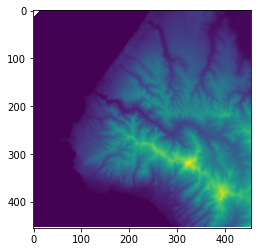

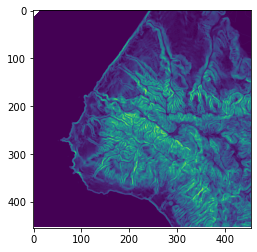

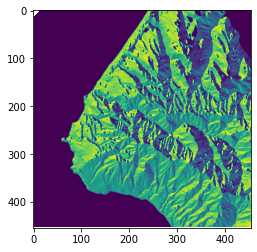

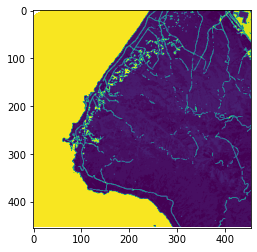

El valor mas repetido en la variable es 98


[array([[0.01910789, 0.01910789, 0.01910789, 0.01910789, 0.01910789,
         0.01910789, 0.01910789, 0.01910789, 0.01910789, 0.01910789,
         0.01910789, 0.01910789, 0.01910789, 0.01910789, 0.02978865,
         0.03245884, 0.03579657, 0.0404694 , 0.0418045 , 0.04514223,
         0.04781242, 0.04514223, 0.03512902, 0.02444827, 0.02177808,
         0.02177808, 0.02177808],
        [0.01910789, 0.01910789, 0.01910789, 0.01910789, 0.01910789,
         0.01910789, 0.01910789, 0.01910789, 0.01910789, 0.01910789,
         0.01910789, 0.01910789, 0.01844035, 0.02511582, 0.03112374,
         0.03179129, 0.03913431, 0.04380714, 0.04380714, 0.04447468,
         0.04580978, 0.03913431, 0.0291211 , 0.02778601, 0.02444827,
         0.02111054, 0.02177808],
        [0.01910789, 0.01910789, 0.01910789, 0.01910789, 0.01910789,
         0.01910789, 0.01910789, 0.01910789, 0.01910789, 0.01910789,
         0.01910789, 0.01844035, 0.02177808, 0.03379393, 0.03713167,
         0.03379393, 0.0404694 , 0.

In [14]:
matrizde27pd13_5=coord2Matrix27(-120.6,34.6,km2=13.5)
matrizde27pd13_5

In [15]:
### en este caso aunque el v alor mas repetido es el mar, no llega al 50% de las casillas ni ocupa la casilla central por lo que devuelve las 3 otras matrices

matrizde27pd13_5[2].shape


(27, 27)

### los tipos de vegetacion tienen demasiadas categorias, asi que los ignoramos.

LANDFIRE Existing Vegetation Type Attribute Data Dictionary 
Description: The LF assigned code identifying vegetation and land cover types. 
values: 0 - 9829 The code identifies the vegetation and land cover types. 


np.unique(matrizde27pd13_5[len(matrizde27pd13_5)-2]),matrizde27pd13_5[len(matrizde27pd13_5)-2].min(),matrizde27pd13_5[len(matrizde27pd13_5)-2].max(),matrizde27pd13_5[len(matrizde27pd13_5)-2].mean()


(array([   0, 7014, 7043, 7092, 7097, 7105, 7110, 7112, 7113, 7114, 7129,
        7195, 7265, 7292, 7296, 7297, 7298, 7299, 7662, 7668, 7910, 7911,
        7912, 7913, 7914, 9062, 9129, 9130, 9301, 9302, 9329, 9337, 9629,
        9829], dtype=int16),
 0,
 9829,
 6377.617391261597)

# la magtriz de vegetacion no se puede normalizar como las otras. no se hace la media de los pixels, 
# sino que hay que escoger para cada pixel el tipo de vegetacion (valor categorico) más abundante.




In [16]:
# FUNCION PARA RECOGER LA MODA (EL NUMERO MAS FRECUENTE) EN UNA MATRIZ

#en caso de empate escoge el primero de los numeros empatadso que ha encontrado.

def seleccionarModa(matriz):
    c = Counter(list(XArray.flatten()))
    moda=c.most_common(1)
    return moda[0][0]

seleccionarModa(XArray)

#Teniendo en cuenta que dentro de 91 Urban 92 Snow/Ice 93 Agriculture 98 Water 99 Barren



NameError: name 'XArray' is not defined

In [61]:
import pandas as pd

In [62]:
import georasters as gr

/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


# otra opcion seria crear una funcion que devolviera TANTAS MATRICES COMO CATEGORIAS mediante DUMMIES

In [32]:
# esta esta a medio construir y de momento se desecha. 


def prepararMatriZCategorico(CapaMatriz, ValorMinimoPosible=-999,ValorMaximoPosible=-999, numeroPixels=25, normalizada=True):

    
    # AL INTRODUCIR LA MATRIZ SE COMPRUEBA SI SUS VALORES ESTAN DENTRO DE LOS LIMITES ACEPTABLES 

    #pasamos el array a 1 dimension para poder cambiar Todos los datos extremos por el valor maximo
    a1D = CapaMatriz.reshape((len(CapaMatriz)*len(CapaMatriz[0])),1)

    #creamos un contador de extremos (si hubiera muchos, posiblemente habria un problema con el supuesto valor maximo)
    contadorExtremos0 = 0
    if ValorMinimoPosible != -999:
        for valor in range(len(a1D)):
            if a1D[valor] < ValorMinimoPosible:
                a1D[valor] = ValorMinimoPosible

                contadorExtremos0 = contadorExtremos0+1
       
        #print(f"Se han encontrado {contadorExtremos0} elementos extremos que se han substituido por el valor minimo: {ValorMinimoPosible}")       
        if contadorExtremos0>2:
            print(print(f"Se han encontrado {contadorExtremos0} elementos extremos que se han substituido por el valor minimo: {ValorMinimoPosible}"))       

    else:
        #Si estos valores no estuvieran saldrá un aviso
        ValorMinimoPosible=0
        print("falta el valor minimo posible de este atributo")

 
    contadorExtremos = 0

    if ValorMaximoPosible != -999:
        for valor in range(len(a1D)):
            if a1D[valor] > ValorMaximoPosible:
                a1D[valor] = ValorMaximoPosible
                contadorExtremos = contadorExtremos+1

        #print(f"Se han encontrado {contadorExtremos} elementos extremos que se han substituido por el valor maximo: {ValorMaximoPosible}")       
        if contadorExtremos0>2:
            print(print(f"Se han encontrado {contadorExtremos0} elementos extremos que se han substituido por el valor minimo: {ValorMinimoPosible}"))       
                  
    else:
        #Si estos valores no estuvieran saldrá un aviso
        ValorMaximoPosible=50
        print("falta el valor maximo posible de este atributo")
        
    #devolvemos el array a la matriz original SIN LOS VALORES EXTREMOS
    XArray = a1D.reshape(len(CapaMatriz),len(CapaMatriz[0]))
#print(f"Sin extremos:\n{XArray}")

    #guardamos los max y minimos de la matriz original
    miniMat=XArray.min()
    maxiMat=XArray.max()
#print(miniMat)

    XArrayA0 = (XArray-XArray.min()) #esto mueve el rango de 0 a max
    arrayNorm0_1 = XArrayA0/XArrayA0.max() #esto lo normaliza
#print(f"Normalizada:{arrayNorm0_1}") #Esto es con lo que alimentaremos la imagen para la creacion o fusion de N pixels
    
    
    #convertimos el array en una imagen con valor min = 0 azul y max = 255 amarillo
    img = Image.fromarray((arrayNorm0_1 * 255).astype(np.uint8))
#plt.matshow(img)
    #convertimos la imagen en matriz
    img2 = img.resize((numeroPixels, numeroPixels), Image.BICUBIC) #ANTIALIAS) #BILINEAR) NEAREST
    
    arrayImagen = np.array(img2, copy=True)
    
    #print(f"Nuevo Tamanyo:\n{arrayImagen}")

    # CONVERSION DE LA IMAGEN EN COLOR MODIFICADA O NO, A UNA MATRIZ EN BASE A LOS MAXIMOS Y MINIMOS DE LA MATRIZ ORIGINAL

    casiNormalizado=arrayImagen/arrayImagen.max()


    miniFoto=casiNormalizado.min()
    maxiFoto=casiNormalizado.max()

    for x in range(len(casiNormalizado)):
        for y in range(len(casiNormalizado[x])):
            if casiNormalizado[x][y] == miniFoto:
                casiNormalizado[x][y] = miniMat
            elif casiNormalizado[x][y] == maxiFoto:
                casiNormalizado[x][y] = maxiMat
            else: 
                casiNormalizado[x][y] = ((casiNormalizado[x][y])*(maxiMat-miniMat)) + miniMat
        conValoresReales=casiNormalizado
        
        
    if normalizada==False :        
        return conValoresReales     
        
    else:
        #print(casiNormalizado)
        
        rango = ValorMaximoPosible - ValorMinimoPosible

        matrizNormalizadaEnAbsolutos = (conValoresReales-ValorMinimoPosible)/rango

        return matrizNormalizadaEnAbsolutos 
    
   




    return UNA MATRIZ O las13matricesDeTipoVegetacion

In [28]:
matrizde27pd13_5[]

1

In [42]:
matrizde25pd12_5=coord2Matrix(-120.65,34.6,km2=12.5)
matrizde25pd12_5 

/Users/xaf/opt/anaconda3/envs/TFM/lib/python3.7/site-packages/pandas/core/groupby/ops.py:958: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return type(sdata)(mgr, name=sdata.name, fastpath=True)


[array([[0.01896928, 0.01896928, 0.01896928, 0.01896928, 0.01896928,
         0.01896928, 0.01896928, 0.01896928, 0.01896928, 0.01896928,
         0.01896928, 0.01896928, 0.01896928, 0.01896928, 0.01896928,
         0.01896928, 0.01896928, 0.01896928, 0.01896928, 0.01896928,
         0.01896928, 0.01844035, 0.02108502, 0.02743223, 0.03113477],
        [0.01896928, 0.01896928, 0.01896928, 0.01896928, 0.01896928,
         0.01896928, 0.01896928, 0.01896928, 0.01896928, 0.01896928,
         0.01896928, 0.01896928, 0.01896928, 0.01896928, 0.01896928,
         0.01896928, 0.01896928, 0.01896928, 0.01896928, 0.01896928,
         0.01896928, 0.01949822, 0.02901904, 0.03113477, 0.03483731],
        [0.01896928, 0.01896928, 0.01896928, 0.01896928, 0.01896928,
         0.01896928, 0.01896928, 0.01896928, 0.01896928, 0.01896928,
         0.01896928, 0.01896928, 0.01896928, 0.01896928, 0.01896928,
         0.01896928, 0.01896928, 0.01896928, 0.01896928, 0.01896928,
         0.01844035, 0.02425863,

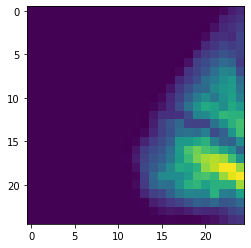

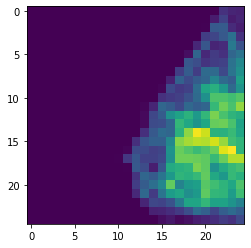

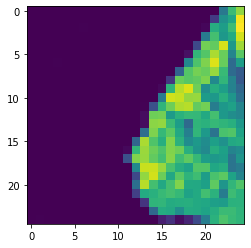

In [43]:
for x in range(len(matrizde25pd12_5)):
    plot.show(matrizde25pd12_5[x])

In [ ]:
otras imagenes de mas detalle antes de hacer la reduccion de informacion a 25 pixels

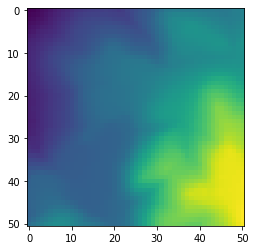

In [19]:
plot.show(ejemplo1_5[0])

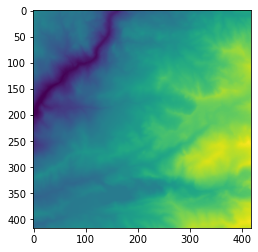

In [20]:
plot.show(ejemplo12_5[0])

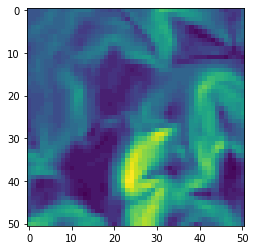

In [21]:
plot.show(ejemplo1_5[1])

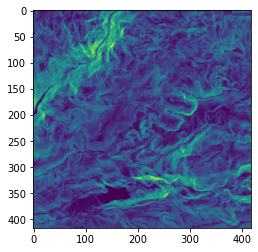

In [22]:
plot.show(ejemplo12_5[1])

In [1]:
'''
matrices_Slope_SinFuego=[]

for nofuego in range(len(fuegosYnofuegos)):

    matrices_Slope_SinFuego.append(coord2MatrixSLOPE(fuegosYnofuegos['sinFuegoLong'][nofuego] ,fuegosYnofuegos['sinFuegoLat'][nofuego],km2=12.5,deESPG=4326,aESPG=5070))
'''    

"\nmatrices_Slope_SinFuego=[]\n\nfor nofuego in range(len(fuegosYnofuegos)):\n\n    matrices_Slope_SinFuego.append(coord2MatrixSLOPE(fuegosYnofuegos['sinFuegoLong'][nofuego] ,fuegosYnofuegos['sinFuegoLat'][nofuego],km2=12.5,deESPG=4326,aESPG=5070))\n"